# Example 5

The aim of this notebook is to go forward in the analysis performed by Audrey BROUILLET (IRD) : determine the date of end of growing season based on the sowing date estimated through satellite RFE estimates, plus sum of temperatures based on the values for an early and a late variety. Then, we aim to compute different indices in the determined growing period, as the number of days above a given cstr threshold

## Imports

In [1]:
import numpy as np
import pandas as pd
from pcse.db import NASAPowerWeatherDataProvider
from pcse.util import reference_ET
import datetime
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm
import io
import xarray as xr
from sarra_py import *
import time
import geopandas as gpd

 ## Analysis parameters

In [2]:
# weather and rainfall data path
rainfall_data_paths = {
                        "CHIRPS" : "/mnt/d/climate_database/CHIRPS_v2.0_Africa_niger/",
                        "TAMSAT" : "/mnt/d/climate_database/TAMSAT_v3.1_niger_rfe_filled_1983_2021_DL20230614/"
                      }
climate_data_path = "/mnt/d/climate_database/AgERA5_niger_1981_2021_DL20230615/"

# parameter files
file_paramVariete = "millet_variety.yaml"
file_paramITK = "millet_niger_2017.yaml"
file_paramTypeSol = "USA_iowa_V42.yaml"

# parameters for time series analysis
year_start = 1981
year_end = 2020
duration = 365 # we load all days of the year for this analysis
dataset = "CHIRPS"

# these are raw sowing dates, we apply the conversion 
# 	rainfall_data_name	surface_tank_stock_thres	statistic	pvalue	        slope	    intercept
# 0	CHIRPS	            9.0	                        0.800729	3.735480e-08	0.523348	80.447395
# 1	IMERG	            7.0	                        0.737603	1.461616e-06	0.476904	88.381622
# 2	PrISM	            1.5	                        0.159241	3.840073e-01	0.090007	159.980704
# 3	TAMSAT	            4.0	                        0.722931	2.963702e-06	0.921178	58.415641

correction_coefficients = {
    "CHIRPS": {
        "slope":0.523348,
        "intercept":80.447395,
    },
    "TAMSAT":{
        "slope":0.921178,
        "intercept":58.415641,
    }
}

In [3]:
# we start by loading the estimated sowing dates, previously produced for CHIRPS and TAMSAT

# listing the result files
path = "./exemple_3_sowing_date_timeseries/"+dataset+"/"
files = os.listdir(path)
files.sort()

# load all the files in a rioxarray along the time dimension and drop the band dimension
ds = xr.open_mfdataset(path + "*.tif", concat_dim="time", combine="nested")
ds = ds.squeeze("band")

# we correct the sowing dates using the correction coefficients
ds["sowing_date_corrected"] = ds["band_data"] * correction_coefficients[dataset]["slope"] + correction_coefficients[dataset]["intercept"]

## Performing the analysis

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:54<00:00, 10.95s/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


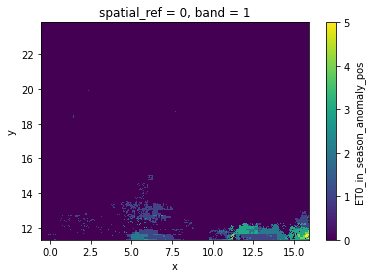

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


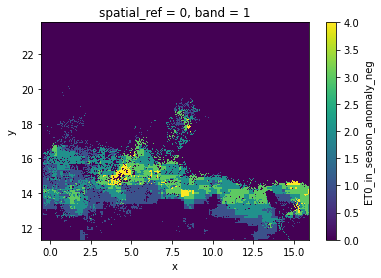

100%|██████████| 5/5 [01:02<00:00, 12.43s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


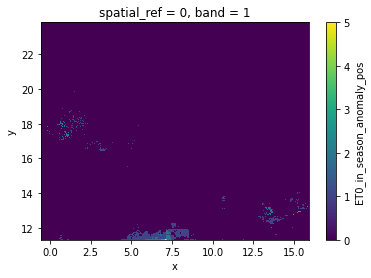

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


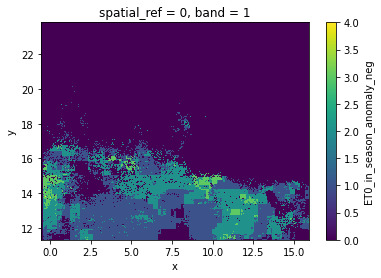

100%|██████████| 5/5 [01:06<00:00, 13.26s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


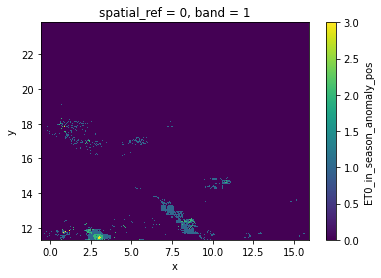

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


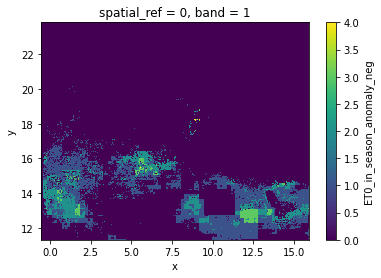

100%|██████████| 5/5 [01:06<00:00, 13.29s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


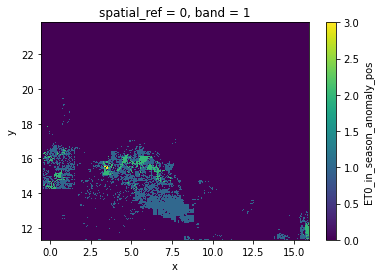

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


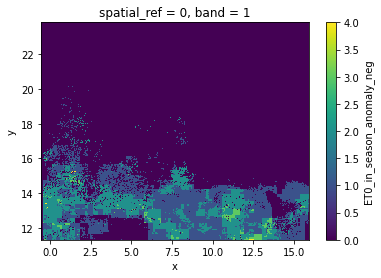

100%|██████████| 5/5 [01:03<00:00, 12.71s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


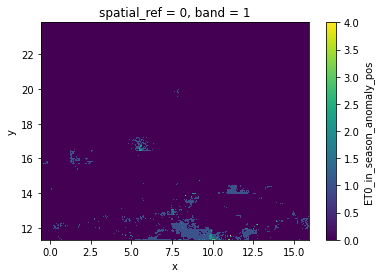

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


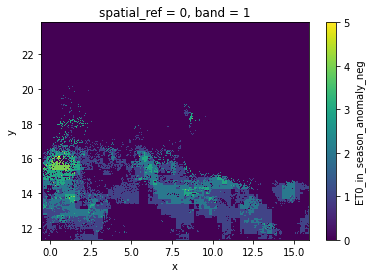

100%|██████████| 5/5 [01:01<00:00, 12.38s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


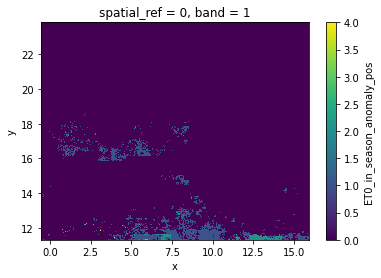

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


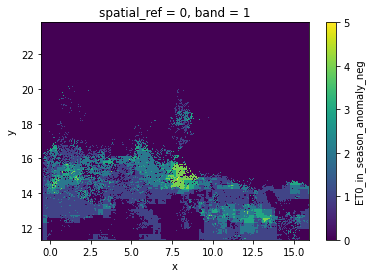

100%|██████████| 5/5 [01:05<00:00, 13.16s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


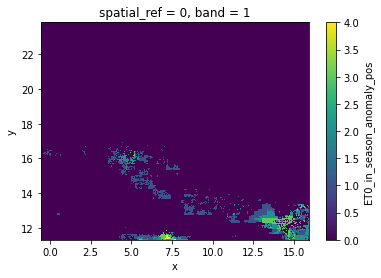

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


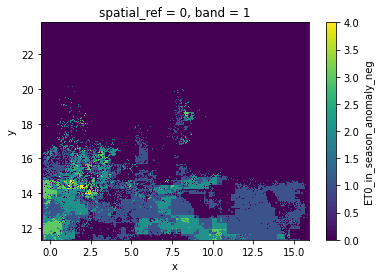

100%|██████████| 5/5 [00:58<00:00, 11.80s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


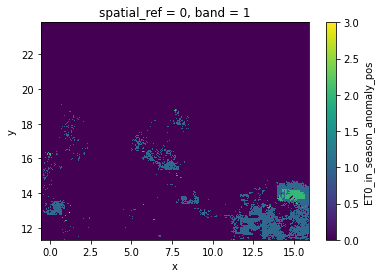

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


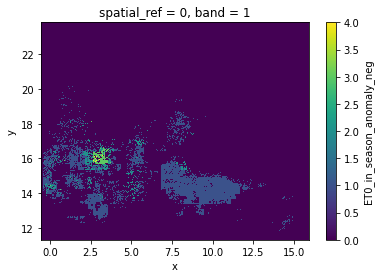

100%|██████████| 5/5 [01:02<00:00, 12.43s/it]/it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


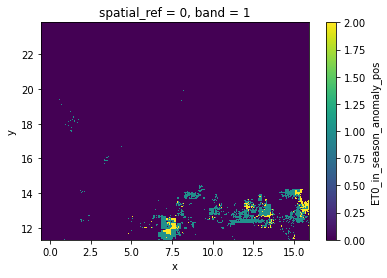

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


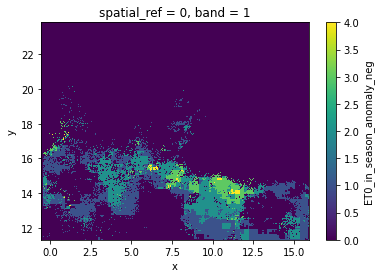

100%|██████████| 5/5 [01:08<00:00, 13.68s/it]t]  
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


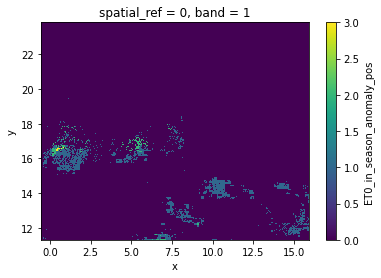

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


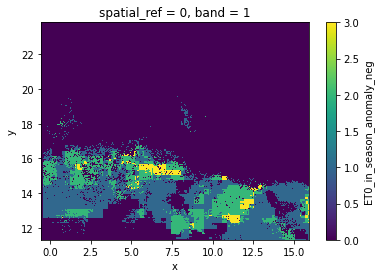

100%|██████████| 5/5 [00:56<00:00, 11.31s/it]it]
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


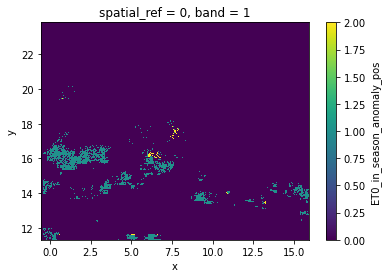

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


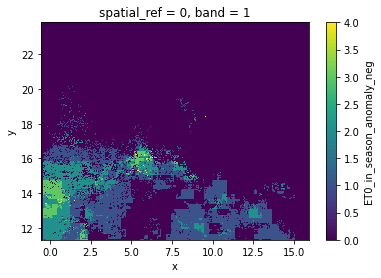

 28%|██▊       | 11/39 [21:39<55:08, 118.16s/it]


ValueError: The date range may not be covered by the available rainfall data ; please check rainfall entry files.

In [4]:
for year_id in tqdm(range(year_end-year_start)):

    year = year_start + year_id


    # defining date of simulation start and simulation length in days
    date_start = datetime.date(year,1,1)

    # retrieving the grid size from the rainfall data (this method will be deprecated in the future)
    rainfall_data_path = rainfall_data_paths[dataset]
    grid_width, grid_height = get_grid_size(rainfall_data_path, date_start, duration)

    ## preparing the base dataset
    # initialize empty xarray dataset to load base data
    base_data = xr.Dataset()

    # load rainfall and weather data
    base_data = load_TAMSAT_data(base_data, rainfall_data_path, date_start, duration)
    base_data = load_AgERA5_data(base_data, climate_data_path, date_start, duration)

    # load soil data using the iSDA method (uses more recent maps)
    base_data = load_iSDA_soil_data_alternate(base_data, grid_width, grid_height)

    # compute the day lengthµ
    base_data = calc_day_length_raster_fast(base_data, date_start, duration)

    ## prepating simulation dataset
    # load variety, cropping system and soil parameters
    paramVariete, paramITK, paramTypeSol = load_YAML_parameters(file_paramVariete, file_paramITK, file_paramTypeSol)
    paramITK["DateSemis"] = datetime.date(year,5,1)

    # creating simulation xarray dataset by copying the base data
    data = base_data.copy()

    # initializing all the necessary variables
    data = initialize_simulation(data, grid_width, grid_height, duration, paramVariete, paramITK, date_start)
    data = initialize_default_irrigation(data)
    data = calculate_once_daily_thermal_time(data, paramVariete)

    ## running the model
    # we do not run it here because it takes a long time
    # data = run_model(paramVariete, paramITK, paramTypeSol, data, duration)





    ## determining the date of the end of the season
    # we keep only the daily thermal time after the estimated sowing date
    data["ddj_after_sowing"] = (ds["sowing_date_corrected"][0,:,:] < data["time"]) * data["ddj"]

    # we calculate the cumulative thermal time after the estimated sowing date
    data["sdj_after_sowing"] = data["ddj_after_sowing"].cumsum(axis=0)

    season_length_thermal_time = 1500

    argmax = (data["sdj_after_sowing"] > season_length_thermal_time).argmax(axis=0)
    data["date_end_season"] = xr.where(argmax==0, np.nan, argmax)

    data["season_duration_days"] = (data["date_end_season"] - ds["sowing_date_corrected"][year_id,:,:])

    # save date_end_season to geotiff
    data["date_end_season"].rio.to_raster("./exemple_5/season_end/{}_{}_season_end.tif".format(dataset, year))

    # save date_end_season to geotiff
    ds["sowing_date_corrected"][year_id,:,:].rio.to_raster("./exemple_5/sowing_date_corrected/{}_{}_sowing_date_corrected.tif".format(dataset, year))


    # analyzing anomalies using the z-score method
    variable = "ET0"
    zscore_thresh = 2.5

    data[variable+"_in_season"] = xr.where(data["time"] >= ds["sowing_date_corrected"][year_id,:,:],
            xr.where(data["time"] <= data["date_end_season"],
                    data[variable],
                    np.nan),
            np.nan)

    data[variable+"_in_season_mean"] = data[variable+"_in_season"].mean(dim="time")
    data[variable+"_in_season_std"] = data[variable+"_in_season"].std(dim="time")
    data[variable+"_in_season_zscore"] = (data[variable+"_in_season"] - data[variable+"_in_season_mean"]) / data[variable+"_in_season_std"]
    data[variable+"_in_season_zscore"].plot()
    data[variable+"_in_season_anomaly_pos"] = xr.where(data[variable+"_in_season_zscore"] > zscore_thresh, 1, 0)
    data[variable+"_in_season_anomaly_pos"].sum(dim="time").plot()
    plt.show()
    data[variable+"_in_season_anomaly_neg"] = xr.where(data[variable+"_in_season_zscore"] < -zscore_thresh, 1, 0)
    data[variable+"_in_season_anomaly_neg"].sum(dim="time").plot()
    plt.show()

    # save anomalies to geotiff
    # if variable+"_in_season_anomaly_neg" folder does not exist, create it
    if not os.path.exists("./exemple_5/"+variable+"_in_season_anomaly_pos/"):
        os.makedirs("./exemple_5/"+variable+"_in_season_anomaly_pos/", exist_ok=True)

    data[variable+"_in_season_anomaly_pos"].rio.to_raster("./exemple_5/"+variable+"_in_season_anomaly_pos/{}_{}_{}_anomaly_pos.tif".format(dataset, year, variable))

    if not os.path.exists("./exemple_5/"+variable+"_in_season_anomaly_neg/"):
        os.makedirs("./exemple_5/"+variable+"_in_season_anomaly_neg/", exist_ok=True)

    data[variable+"_in_season_anomaly_neg"].rio.to_raster("./exemple_5/"+variable+"_in_season_anomaly_neg/{}_{}_{}_anomaly_neg.tif".format(dataset, year, variable))

    del data


In [5]:
xxx

NameError: name 'xxx' is not defined

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


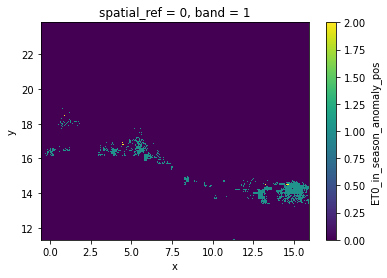

/home/jeremy/.pyenv/versions/3.9.6/envs/venv_SARRA_Py/lib/python3.9/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


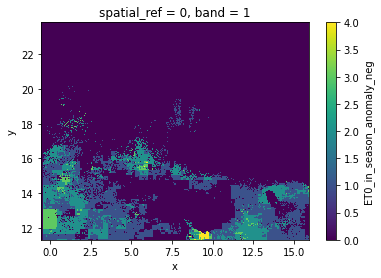

In [ ]:
xxx

NameError: name 'xxx' is not defined

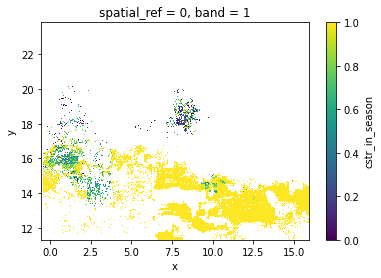

In [ ]:
# data["cstr_in_season"]

data["cstr_in_season"] = xr.where(data["time"] >= ds["sowing_date_corrected"][0,:,:],
        xr.where(data["time"] <= date_end_season,
                data["cstr"],
                np.nan),
        np.nan)

data["cstr_in_season"][250,:,:].plot()

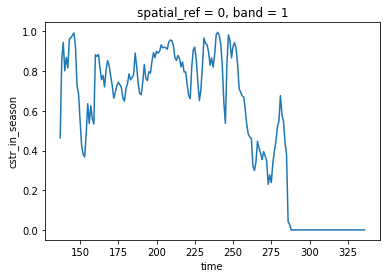

In [ ]:
data["cstr_in_season"].mean(axis=(1,2)).plot()

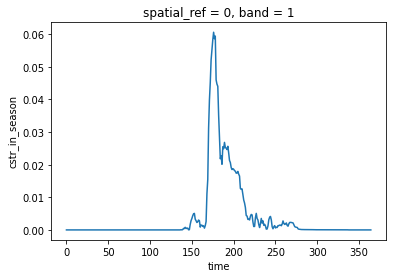

In [ ]:
# pourcentage de pixels qui sont à 0
(data["cstr_in_season"]==0).mean(axis=(1,2)).plot()

In [ ]:
(data["cstr_in_season"]==0)


<xarray.DataArray 'cstr_in_season' (time: 365, y: 251, x: 329)>
dask.array<eq, shape=(365, 251, 329), dtype=bool, chunksize=(365, 251, 329), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 -0.525 -0.475 -0.425 -0.375 ... 15.78 15.83 15.88
  * y            (y) float64 23.82 23.77 23.72 23.67 ... 11.47 11.42 11.37 11.32
    spatial_ref  int64 0
    band         int64 1
Dimensions without coordinates: time

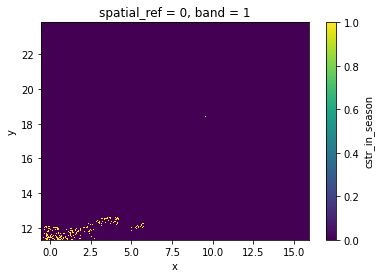

In [ ]:
thres = 0.2
(data["cstr_in_season"]<thres)[140,:,:].plot()

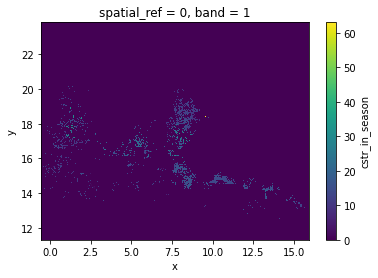

In [ ]:
((data["cstr_in_season"]<thres).cumsum(dim="time") * (data["cstr_in_season"]<thres))[200,:,:].plot()

In [ ]:
(data["cstr_in_season"]<thres)

<xarray.DataArray 'cstr_in_season' (time: 365, y: 251, x: 329)>
dask.array<lt, shape=(365, 251, 329), dtype=bool, chunksize=(365, 251, 329), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 -0.525 -0.475 -0.425 -0.375 ... 15.78 15.83 15.88
  * y            (y) float64 23.82 23.77 23.72 23.67 ... 11.47 11.42 11.37 11.32
    spatial_ref  int64 0
    band         int64 1
Dimensions without coordinates: time

In [ ]:
matrix = (data["cstr_in_season"]<thres)
axis = 0
cumsum = np.cumsum(matrix, axis=axis)
reset_mask = np.cumsum(1 - matrix, axis=axis) * matrix
consecutive = cumsum * matrix - reset_mask


In [ ]:
consecutive[140,:,:].plot()

: 

: 